# Example 6-1: Butterworth filtering of signals using SciPy
## Amplitude response

Processing signals from experiments often involves filtering to remove frequency content that is not interesting or disturbs the analysis we would like to do. Unfortunately, removing some of the frequency content without disturbing the frequency content of interest is impossible. Filters are therefore designed to remove the undesired frequency content and, at the same time, disturb the interesting frequency content as little as possible.

The filter called $H(\omega)$ is applied to the original signal $x(\omega)$ as follows:

$$
x_f(\omega)=H(\omega)x(\omega)
$$

$x_f(\omega)$ is called the filtered signal.

In this note, we will study the Butterworth filter and how this is implemented in SciPy. The amplitude response of a Butterworth filter is defined as

$$ |H(\omega)| = \frac{1}{\sqrt{1+\left( \dfrac{\omega}{\omega_c} \right)^{2n}}} $$

Here $n$ is the filter order, and $\omega_c$ is the cutoff frequency. We will consider the normalized filter by assuming that the cutoff frequency is one. The figures below show the amplitude response of filters with different orders.

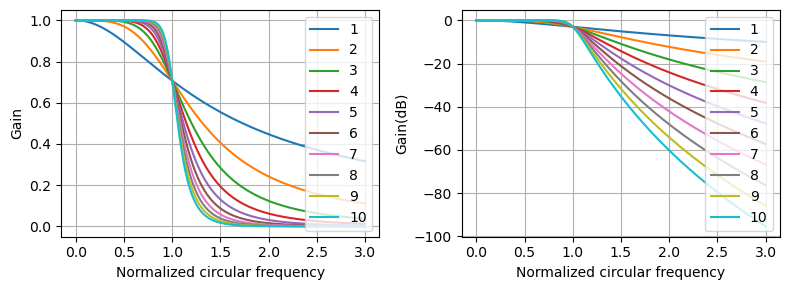

In [52]:
import numpy as np
from scipy import signal as spsp
from matplotlib import pyplot as plt

normalized_circular_frequency = np.linspace(0,3,1001)
filter_orders = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

fig, axs = plt.subplots(1,2,figsize=(8,3))

for filter_order in filter_orders:
    amplitude_response = 1 /( (1+ normalized_circular_frequency**(2*filter_order))**0.5)
    axs[0].plot(normalized_circular_frequency,amplitude_response, label = str(filter_order))
    axs[1].plot(normalized_circular_frequency,20*np.log10(amplitude_response), label = str(filter_order))
    
axs[0].legend()
axs[0].grid()
axs[0].set_ylabel("Gain")
axs[0].set_xlabel("Normalized circular frequency")

axs[1].legend()
axs[1].grid()
axs[1].set_ylabel("Gain(dB)")
axs[1].set_xlabel("Normalized circular frequency")


fig.tight_layout()
plt.show()

    

The figures illustrate that the filter will not change the amplitudes of the lower frequencies, while the amplitudes of the higher frequencies are reduced significantly. The filter is thus a low pass filter. In low-pass signal filtering, we would like to keep the amplitudes of the frequency content below the cutoff frequency and remove the frequency content above it. This objective is not perfectly achieved for any of the filters, and it is vital to select the cutoff frequency and the filter order so that the filter performs as you prefer.

## Filter design

The equation for the filter amplitude response contains two parameters, the cutoff frequency $\omega_c$ and the filter order $n$. It is thus possible to define the filter using two points on the amplitude response curve of the filter. We start by considering the expression for the filter gain at frequencies $\omega_p$ and $\omega_s$

$$ G_{p}^2 = \dfrac{1}{1+\left( \dfrac{\omega_{p}}{\omega_c} \right)^{2n}} $$

$$ G_{s}^2 = \dfrac{1}{1+\left( \dfrac{\omega_{s}}{\omega_c} \right)^{2n}} $$

We rewrite the two equations.

$$ \left( \dfrac{\omega_{p}}{\omega_c} \right)^{2n}   = 1/G_{p}^2 -1 $$

$$ \left( \dfrac{\omega_{s}}{\omega_c} \right)^{2n}   = 1/G_{s}^2 -1 $$

We can now divide the first equation by the second equation.

$$ \left(\dfrac{\frac{\omega_{p}}{\omega_c}}{\frac{\omega_{s}}{\omega_c}} \right)^{2n} = \dfrac{1/G_{p}^2 -1}{1/G_{s}^2 -1} $$


$$ \left(\dfrac{\omega_{p}}{\omega_s} \right)^{2n} = \dfrac{1/G_{p}^2 -1}{1/G_{s}^2 -1} $$

We can then solve for the filter order $n$

$$ 2n\ln\left(\dfrac{\omega_{p}}{\omega_s} \right) = \ln \left( \dfrac{1/G_{p}^2 -1}{1/G_{s}^2 -1} \right) $$


$$ n = \dfrac{ \ln \left( \dfrac{1/G_{p}^2 -1}{1/G_{s}^2 -1} \right)} {2\ln\left(\dfrac{\omega_{p}}{\omega_s} \right) } $$

We can then use one of the equations to calculate the cutoff frequency.

$$ \dfrac{\omega_{p}}{\omega_c}   = \left( 1/G_{p}^2 -1 \right)^{\frac{1}{2n}} $$


$$ \omega_c = \dfrac{\omega_{p}}{\left( 1/G_{p}^2 -1 \right)^{\frac{1}{2n}}}$$

We can then summarize the design equations as

$$ n = \dfrac{ \ln \left( \dfrac{1/G_{p}^2 -1}{1/G_{s}^2 -1} \right)} {2\ln\left(\dfrac{\omega_{p}}{\omega_s} \right) } $$

$$ \omega_c = \dfrac{\omega_{p}}{\left( 1/G_{p}^2 -1 \right)^{\frac{1}{2n}}}$$

### Design example
Let us consider a case where we would like to have a gain of 0.95 at 1 Hz and 0.05 at 2 Hz

$$ n = \dfrac{ \ln \left( \dfrac{1/0.95^2 -1}{1/0.05^2 -1} \right)} {2\ln\left(\dfrac{2\pi\cdot1}{2\pi\cdot2} \right) } =5.925 $$

The filter order needs to be an integer. We therefore use $n = 6$. The cutoff frequency is then. 

$$ \omega_c = \dfrac{2\pi\cdot1}{\left( 1/0.95^2 -1 \right)^{\frac{1}{2\cdot6}}} = 7.56$$

Let us plot the filter to verify the design.

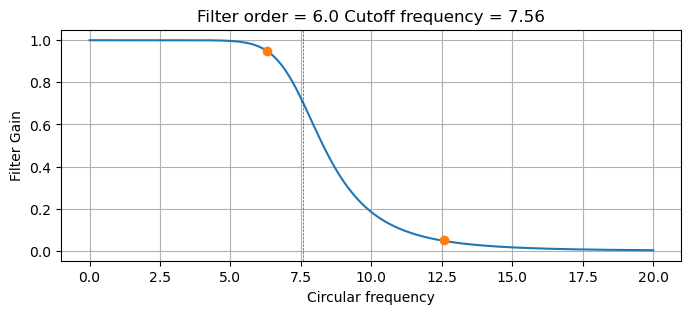

In [53]:
circular_frequency = np.linspace(0,20,1000)
gain_pass_band = 0.95
circular_frequency_pass_band = 1*2*np.pi
gain_stop_band = 0.05
circular_frequency_stop_band = 2*2*np.pi

filter_order = np.log((1/gain_pass_band**2-1)/(1/gain_stop_band**2-1))/ (2*np.log(circular_frequency_pass_band/circular_frequency_stop_band))
filter_order  = np.around(filter_order )
circular_cutoff_frequency = circular_frequency_pass_band / (( 1/gain_pass_band**2-1)**(1/2/filter_order))

amplitude_response = 1.0 /np.sqrt(( 1.0 + (circular_frequency/circular_cutoff_frequency)**(2.0*filter_order)))

plt.figure(figsize=(8,3))
plt.plot(circular_frequency,amplitude_response)
plt.plot([circular_frequency_pass_band, circular_frequency_stop_band],[gain_pass_band, gain_stop_band],'o')
plt.axvline(circular_cutoff_frequency,color ='r',linewidth=0.5,linestyle='--')
plt.grid()
plt.xlabel("Circular frequency")
plt.ylabel("Filter Gain")
plt.title(("Filter order = " + str(filter_order) + " Cutoff frequency = " + str(np.around(100*circular_cutoff_frequency)/100)))
plt.show()


The figure above confirms that the filter is behaving as expected. The curve will not perfectly pass through the points since the filter order needs to be an integer.

# Filter frequency response

We will now study how to filter signals using a Butterworth filter implemented in SciPy.signal.
The following python code can obtain a Butterworth filter. We define an analog filter since we want to study the frequency response corresponding to continuous time.



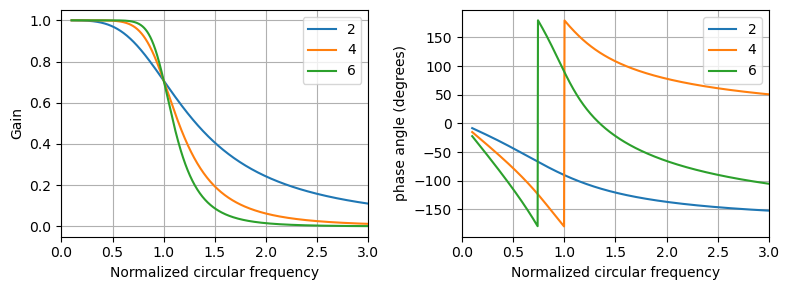

In [54]:
from scipy import signal as spsp
circular_cutoff_frequency = 1
filter_orders = [2, 4, 6]

fig, axs = plt.subplots(1,2,figsize=(8,3))

for filter_order in filter_orders:
    b, a = spsp.butter(filter_order,circular_cutoff_frequency, analog=True) #Obtain the filter coefficients

    circular_frequency, frequency_response = spsp.freqs(b,a,worN = 1000)
    
    axs[0].plot(circular_frequency,np.abs(frequency_response),label = str(filter_order))
        
    phase = np.arctan2(np.imag(frequency_response),np.real(frequency_response))
    
    axs[1].plot(circular_frequency,phase*360/2/np.pi,label = str(filter_order))
    
axs[0].legend()
axs[0].grid()
axs[0].set_xlim(0,3)
axs[0].set_ylabel("Gain")
axs[0].set_xlabel("Normalized circular frequency")

axs[1].legend()
axs[1].grid()
axs[1].set_xlim(0,3)
axs[1].set_ylabel("phase angle (degrees)")
axs[1].set_xlabel("Normalized circular frequency")

fig.tight_layout()
plt.show()



We see that the obtained frequency response functions correspond perfectly to the results presented earlier in this note. The figure also shows the phase angle of the filter. The phase will delay between the original signal and the filtered signal. The phase angles of the frequency components may create severe artifacts, and it is, therefore, necessary to study this further. Let us generate a single harmonic signal and add some white noise to it.

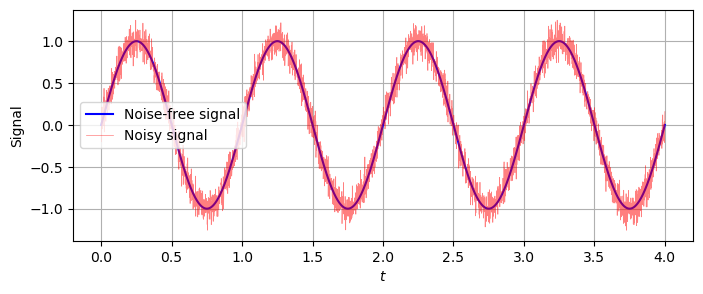

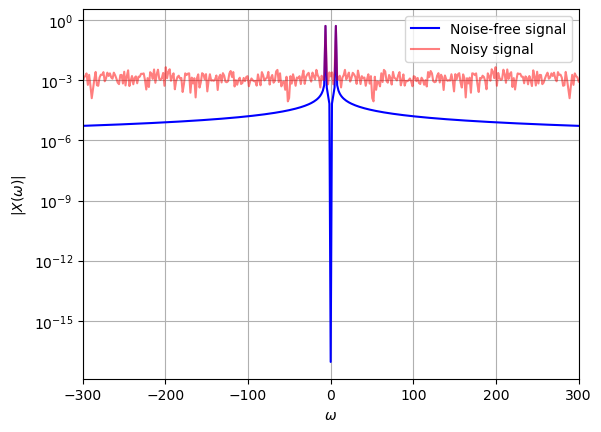

In [59]:
t = np.linspace(0,4,4001)
frequency = 1

signal = np.sin(2*np.pi*frequency*t)

signal_noisy = signal + np.random.normal(loc=0.0,scale = 0.1, size = t.shape[0])

plt.figure(figsize=(8,3))
plt.plot(t,signal,color='b',label='Noise-free signal')
plt.plot(t,signal_noisy,color='r',alpha=0.5,linewidth=0.5,label='Noisy signal')
plt.xlabel(r'$t$')
plt.ylabel('Signal')
plt.grid()
plt.legend()
plt.show()


signal_fft = np.fft.fftshift(np.fft.fft(signal))/signal.shape[0] # Fourier coefficients by fft
Npoints = t.shape[0] # Npoints in the time series 
fs = 1.0/(t[1]-t[0]) # Sampling frequency
f = np.linspace(-fs/2,fs/2,Npoints) # Frequency axis. From negative to positive Nyquist frequency
w = 2*np.pi*f # Frequency in rad/s
# Plot Fourier amplitudes.

signal_noisy_fft = np.fft.fftshift(np.fft.fft(signal_noisy))/signal.shape[0] # Fourier coefficients by fft

plt.figure()
plt.plot(w,np.abs(signal_fft),color='b',label='Noise-free signal')
plt.plot(w,np.abs(signal_noisy_fft),color='r',alpha=0.5,label='Noisy signal')
plt.xlim(-300,300)
plt.ylabel(r'$|X(\omega)|$')
plt.xlabel(r'$\omega$')
plt.legend()
plt.yscale('log')
plt.grid()


Let us design a filter to remove some of the noise introduced. We can use a third-order filter with a cutoff frequency of 3 Hz and see what happens. It is vital to notice that the filter obtained above is an analog filter. We cannot use this directly since we have a discrete signal and need to get the coefficients for the discrete filter. Also, note that frequencies in Hz are inputs for the digital filter, while frequencies in rad/s were used for the analog filter.

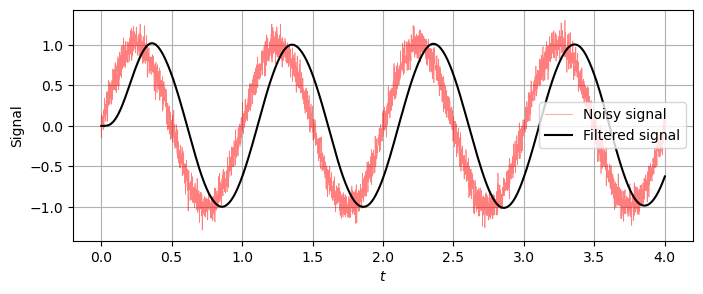

In [56]:
filter_order = 3
cutoff_frequency = 3

sampling_frequency = 1/(t[1]-t[0])

sos = spsp.butter(filter_order,cutoff_frequency,"low", fs=sampling_frequency, output='sos')
signal_noisy_filt = spsp.sosfilt(sos, signal_noisy)

plt.figure(figsize=(8,3))
plt.plot(t,signal_noisy,color='r',alpha=0.5,linewidth=0.5,label='Noisy signal')
plt.plot(t,signal_noisy_filt,color='k',label = "Filtered signal")
plt.xlabel(r"$t$")
plt.ylabel("Signal")
plt.grid()
plt.legend()
plt.show()


The figure above shows most of the noise has been removed and that the signal's amplitude is the same. This observation is according to what we would like to achieve. However, the apparent phase angle between the unfiltered and the filtered signal is an artifact that is not appreciated and needs to be avoided. We can also see a large discrepancy at the beginning of the time series. We, unfortunately, don't know the signal history before $t=0$, and the filtering algorithm assumes that the signal is zero when $t<0$. Inaccuracies are thus introduced at the beginning of the filtered signal. However, the inaccuracy will vanish as the filtered signal mainly depends on the recent signal history. Therefore, we must expect that the filtered signal is inaccurate in the beginning for a duration corresponding to the time interval that the filter's impulse response lasts.

A frequently used approach to improve the filter's performance is to filter the signal two times. The signal is first filtered, as shown above. Then the signal is flipped and filtered backward to introduce the same phase shifts in the opposite direction. The idea is that filtering the signal two times will cancel delays caused by the phase angle. Let's use this approach on our signal.  

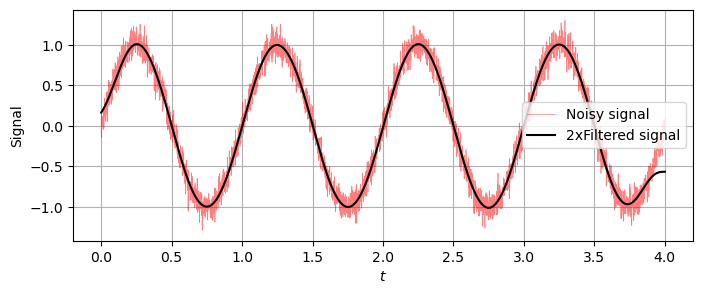

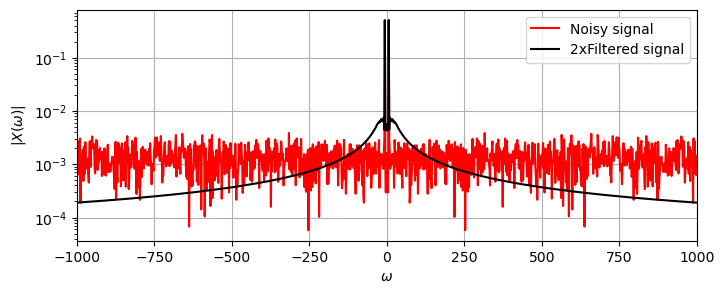

In [58]:
signal_noisy_filtfilt = spsp.sosfiltfilt(sos, signal_noisy)



plt.figure(figsize=(8,3))
plt.plot(t,signal_noisy,color='r',alpha=0.5,linewidth=0.5,label='Noisy signal')
plt.plot(t,signal_noisy_filtfilt,color='k',label = "2xFiltered signal")
plt.xlabel(r"$t$")
plt.ylabel("Signal")
plt.grid()
plt.legend()
plt.show()


signal_noisy_filtfilt_fft = np.fft.fftshift(np.fft.fft(signal_noisy_filtfilt))/signal.shape[0] # Fourier coefficients by fft


plt.figure(figsize=(8,3))
plt.plot(w,np.abs(signal_noisy_fft),color='r',label='Noisy signal')
plt.plot(w,np.abs(signal_noisy_filtfilt_fft),color='k',label='2xFiltered signal')
plt.xlim(-1000,1000)
plt.ylabel(r'$|X(\omega)|$')
plt.xlabel(r'$\omega$')
plt.legend()
plt.yscale('log')
plt.grid()



This gives a good result. Note however that the start and end has transient effects due to the filtering. It is therefore often wise to cut the time series before using it in further analysis.